# Copy Trading

## Import libraries

In [1]:
import pandas as pd
import datetime

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

sns.set()

## Input

### Load data

In [2]:
df = pd.read_csv("Statistics.csv")

In [3]:
df.columns

Index(['Name', 'ID', 'Hotforex url', 'Location', 'Last updated', 'Message',
       'Active since', 'Gain', 'Max Drawdown', 'Followers', 'Performance Fee',
       'Stability Score', 'Performance', 'Balance', 'Equity',
       'Initial Deposit', 'Total Deposits', 'Total Withdrawals', 'Profit',
       'Number of Closed Trades', 'Number of Open Trades',
       'Positive Closed Trades', 'Negative Closed Trades', 'Profitability',
       'Average Profit', 'Average Loss', 'Average Lot Size',
       'Average Trade Length', 'Activity'],
      dtype='object')

Description:

- **Gain**: A time-weighted return method of calculating investment return. To apply the time-weighted return method, combine the return over sub-periods, by compounding them together, resulting in the overall period return. The rate of return over each different sub-period is weighted according to the duration of the sub-period.

- **Max Drawdown**: Worst losing sequence leading to the largest drop in balance (from the date of account opening).

- **Performance Fee**: The percentage of any profit made on the Follower’s account which is then payable to the Strategy Provider as his reward. Performance fees are paid every other Saturday or at time of withdrawal or unfollowing.

- **Stability Score**: Risk Score is determined by comparing certain performance elements between individual Strategy Providers and all other active Strategy Providers. The elements taken into account are daily volatility on return, trading allocation capital and length of overall trading activity within HFcopy system. Strategy Providers are scored 1 to 5 based on the weighted elements where 5 is the highest divergent performance across all other participating Strategy Providers, making it less stable across the board regardless of market conditions and 1 being less unstable overall.

- **Performace**: Show the results of the trading account. It measures in (%).

- **Profitability**: Percentage of trades closed with positive profits.

- **Average Profit**: Average profit for all profitable closed trades. Sometimes the units in USD or USC (USD cent).

- **Average Loss**: Average loss for all unprofitable closed trades. Sometimes the units in USD or USC (USD cent).

- **Gain**: A time-weighted return method of calculating investment return. To apply the time-weighted return method, combine the return over sub-periods, by compounding them together, resulting in the overall period return. The rate of return over each different sub-period is weighted according to the duration of the sub-period. In order to understand how hotforex makes this calculations, please check this [section](#performance_example).

### Bounds

The objective is to define parameters to bound the analysis.

In [4]:
max_drawdown_limit = 40
num_days_limit = 90

## Exploratory Data Analysis

### "ID" numbers

Extract only ID numbers.

In [5]:
df[['ID']].head()

,ID
0,35412226 • Copy Pro account
1,66169040 • Copy Cent account
2,66167076 • Copy Cent account
3,66169034 • Copy Cent account
4,35378631 • Copy Premium account


In [6]:
# Get ID
df['ID'] = df['ID'].apply(lambda x: x.split('  • ')[0] if not pd.isnull(x) else "")

### "Active since" and "Last updated"

We need to convert these two columns as datetime object

In [7]:
df[['Active since', 'Last updated']].head()

,Active since,Last updated
0,24/10/2023,06/11/2023 11:49:50
1,23/10/2023,06/11/2023 11:52:49
2,13/10/2023,06/11/2023 11:52:34
3,23/10/2023,06/11/2023 11:52:48
4,29/03/2023,06/11/2023 11:44:45


In [8]:
# Last updated column. Ignore NaN values
df['Last updated'] = pd.to_datetime(df['Last updated'], format= '%m/%d/%Y %H:%M:%S', errors='coerce')

# Active since column. Ignore NaN values
df['Active since'] = pd.to_datetime(df['Active since'], format= '%d/%m/%Y', errors='coerce')

### Location and Strategies age

In this section, you will filter the data by the number of active days.

In [9]:
# Compute the age of the strategy
df['Active since'].head()

0   2023-10-24
1   2023-10-23
2   2023-10-13
3   2023-10-23
4   2023-03-29
Name: Active since, dtype: datetime64[ns]

In [10]:
# Day when you scraped data
start_date = '2023-11-08'
start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')

In [11]:
# Number of days of the strategies. ".days" attribute extract days from timedelta object
df['Num days strategies'] = (start_date - df.loc[:, 'Active since']).apply(lambda x: x.days) # type: ignore

In [12]:
print(f"Minimum days: {df['Num days strategies'].min()},   Maximum days {df['Num days strategies'].max()}")

Minimum days: 2.0,   Maximum days 1882.0


Select only strategies with a minimun of days on the market. This is a personal criteria.

In [13]:
df_selected = df[df['Num days strategies'] >= num_days_limit].copy()
df_selected.reset_index(drop=True, inplace=True)

In [14]:
print(f"We have {df_selected.shape[0]} strategies with more than {num_days_limit} days.")

We have 513 strategies with more than 90 days.


### Max Drawdown

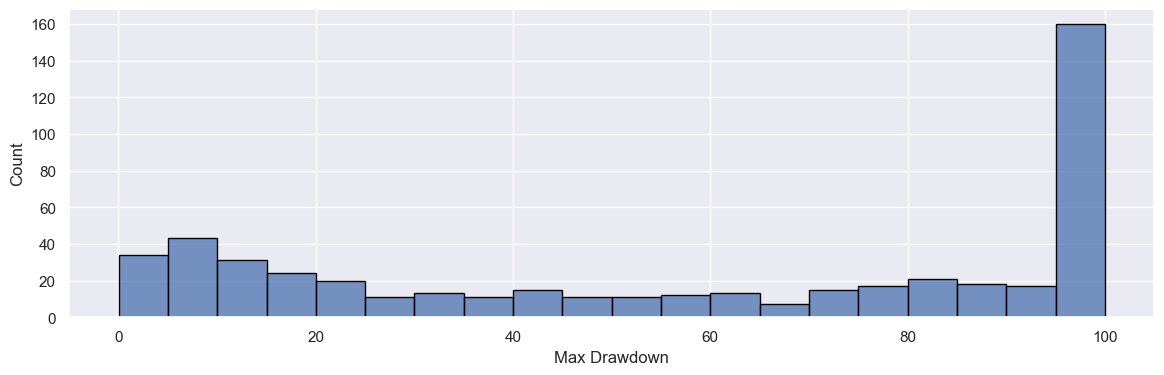

In [15]:
fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x='Max Drawdown', bins=20, ec='black');

We are not interested in analyse strategies with a Maximum Drawdown greater than 40%.

In [16]:
df_selected = df_selected[df_selected['Max Drawdown'] <= max_drawdown_limit].copy()
df_selected.reset_index(drop=True, inplace=True)

In [17]:
print(f"We have selected {df_selected.shape[0]} strategies to analyze.")

We have selected 187 strategies to analyze.


### Locations

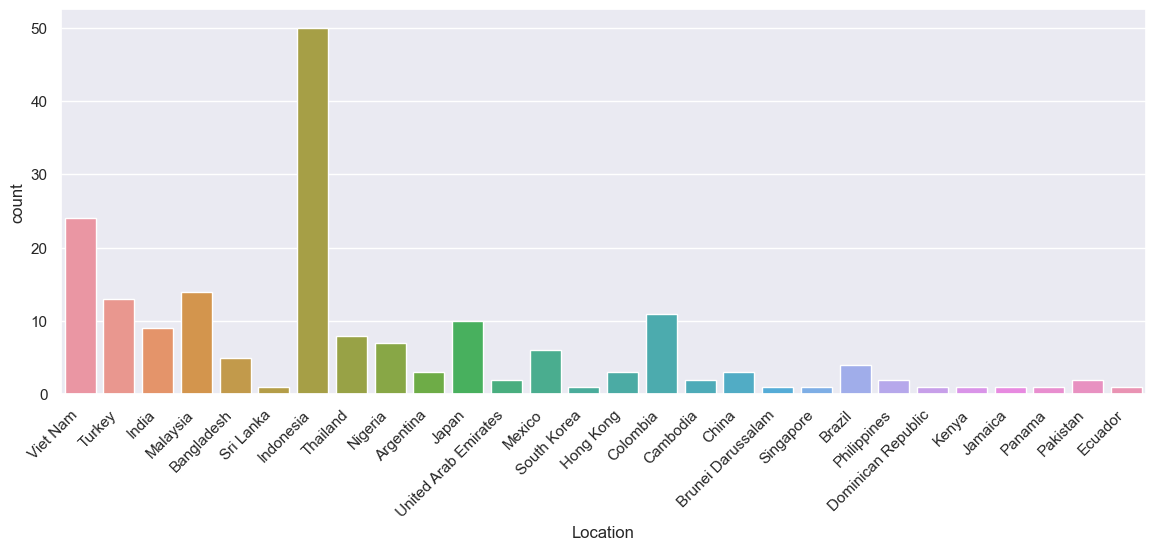

In [18]:
fig, axes = plt.subplots(figsize=(14,5))
bar_plot = sns.countplot(data=df_selected, x='Location', ax=axes)

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right');

Most of the strategies are in Asia

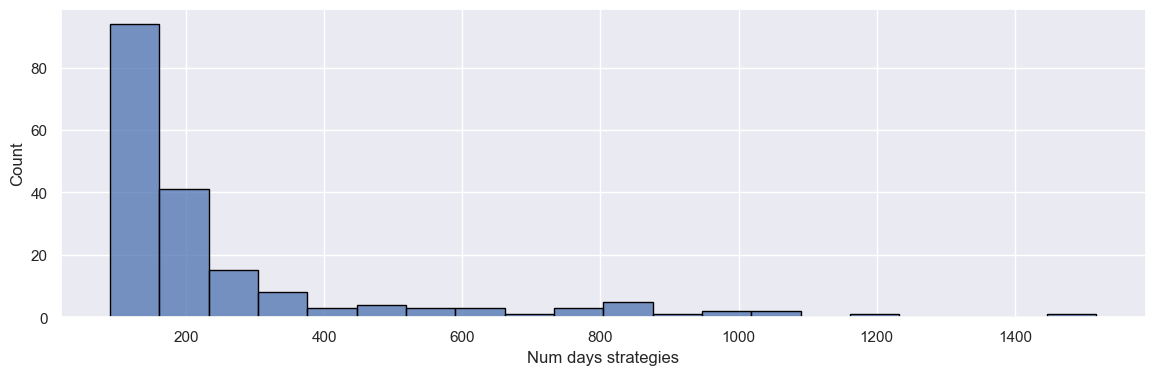

In [19]:
fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x='Num days strategies', bins=20, ec='black');

In [20]:
np.histogram_bin_edges(df_selected['Num days strategies'], bins=20, range=None, weights=None)

array([  90. ,  161.4,  232.8,  304.2,  375.6,  447. ,  518.4,  589.8,
        661.2,  732.6,  804. ,  875.4,  946.8, 1018.2, 1089.6, 1161. ,
       1232.4, 1303.8, 1375.2, 1446.6, 1518. ])

Most of the strategies with less than two years.

### Followers

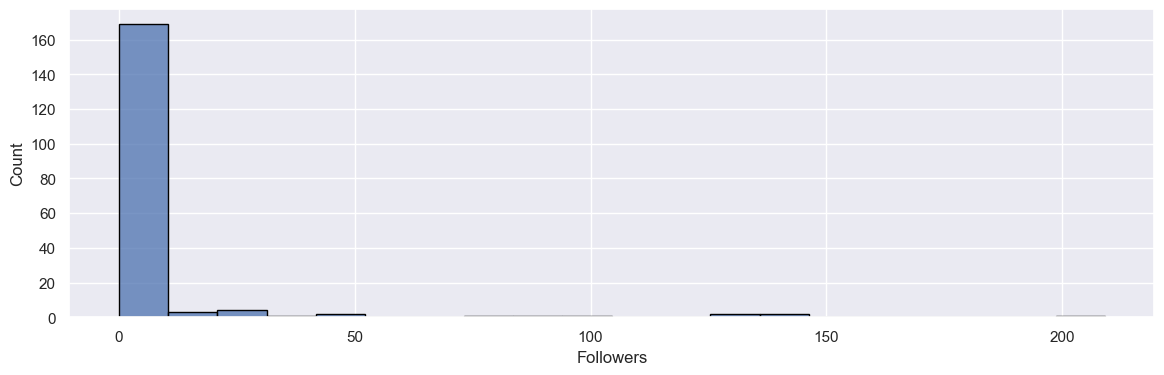

In [21]:
fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x='Followers', bins=20, ec='black');

Most of the strategies don't have followers. Only a few strategies have more than 10

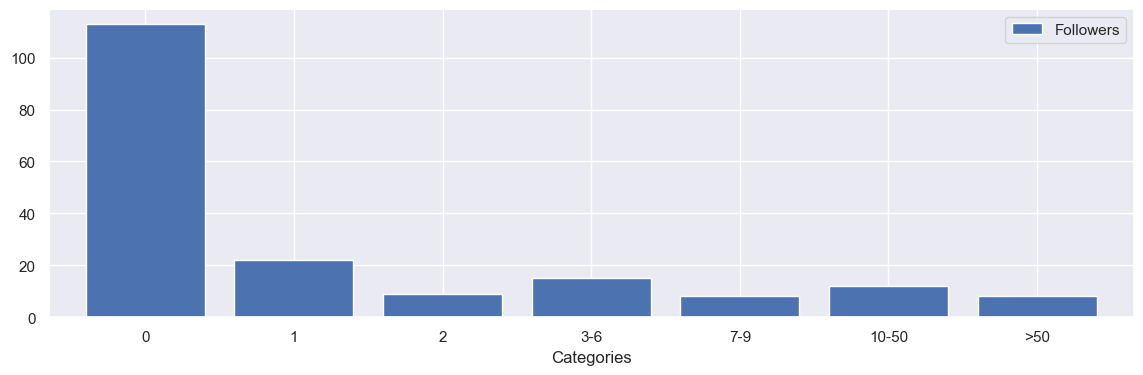

In [22]:
fig, axes = plt.subplots(figsize=(14,4))

temp = pd.DataFrame()
temp['Followers'] = df_selected['Followers']

def find_cat(x):
    if x <= 2:
        return str(int(x))
    elif  3 <= x <= 6:
        return "3-6"
    elif  7 <= x <= 9:
        return "7-9"
    elif  10 <= x <= 50:
        return "10-50"
    elif  x > 50:
        return ">50"

# Apply function to define different categories
temp['Categories'] = temp['Followers'].apply(find_cat)

# Group by new categories
temp = temp.groupby('Categories', as_index=False).count()

# We need to reindex to put the groups in the correct order
temp = temp.reindex(index=[0,1,3,4,5,2,6])

temp.plot.bar(x='Categories', y='Followers', rot=0, width=0.8, ax=axes);

Only 5 strategies have between 10 and 50 followers. 

In [23]:
# Define min and max number of followers
num_followers_min, num_followers_max = 10, 50

# Condition to filter DataFrame
condition = (df_selected['Followers'] >= num_followers_min) & (df_selected['Followers'] <= num_followers_max)

print(f"Only {df_selected[condition].shape[0]} strategies between {num_followers_min} and {num_followers_max} followers")

Only 12 strategies between 10 and 50 followers


In [24]:
# Condition to filter DataFrame
condition = df_selected['Followers'] > num_followers_max

print(f"Only {df_selected[condition].shape[0]} strategies with more than {num_followers_max} followers")

Only 8 strategies with more than 50 followers


**For this Notebook, the popular strategies would be with the followers greater than or equal to 10.**

### Performance Fee

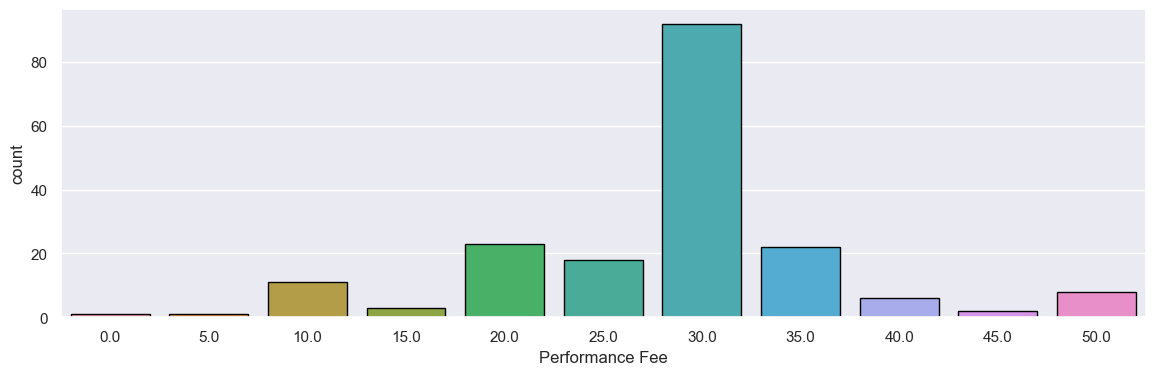

In [25]:
fig, axes = plt.subplots(figsize=(14,4))
sns.countplot(data=df_selected, x='Performance Fee', ec='black');

Most of the strategies requieres 30% of fees.

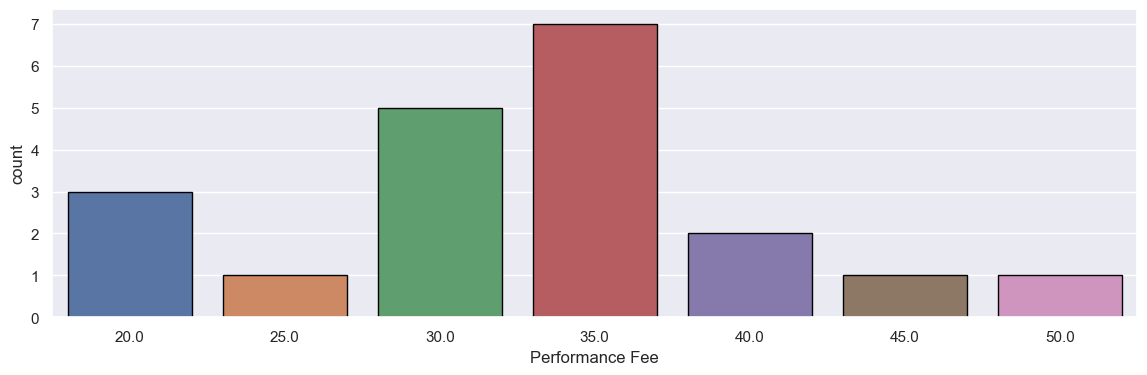

In [26]:
fig, axes = plt.subplots(figsize=(14,4))
sns.countplot(data=df_selected[df_selected['Followers'] >= num_followers_min], x='Performance Fee', ec='black');

The fees distribution of popular stratetegies show a range between 20% - 50%

### Stabililty Score

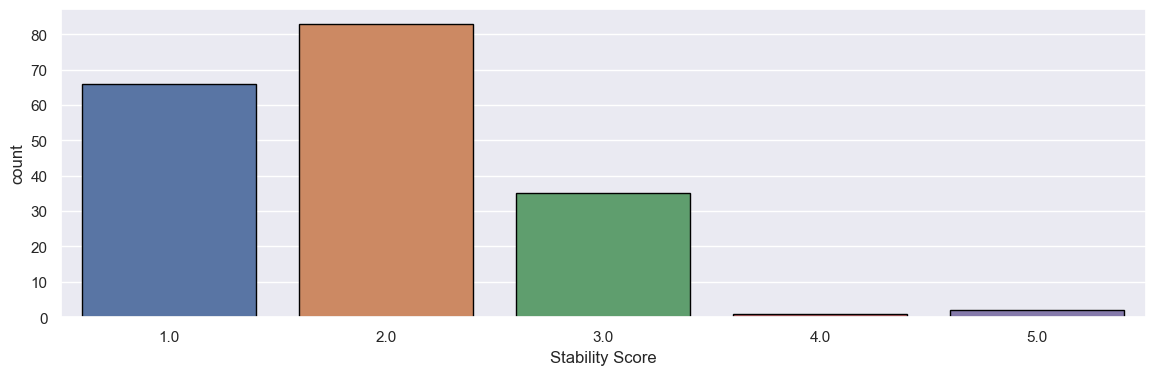

In [27]:
fig, axes = plt.subplots(figsize=(14,4))
sns.countplot(data=df_selected, x='Stability Score', ec='black');

On average, good stability scores.

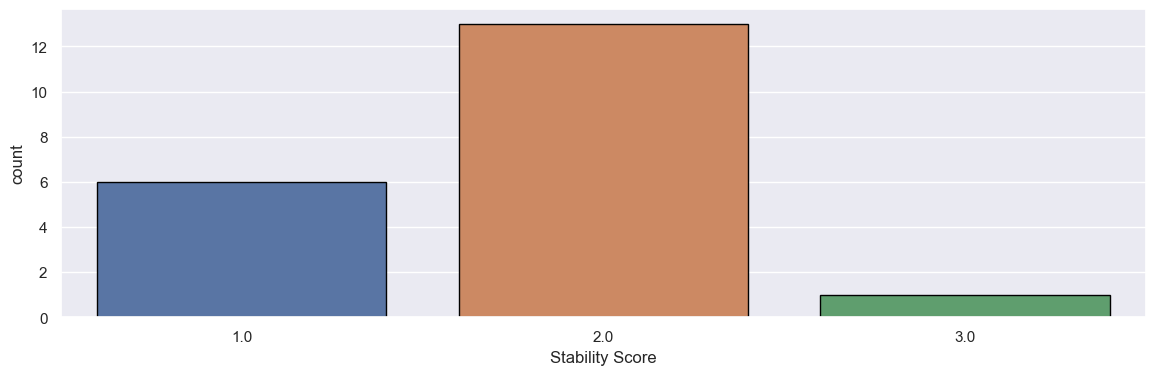

In [28]:
fig, axes = plt.subplots(figsize=(14,4))
sns.countplot(data=df_selected[df_selected['Followers'] >= num_followers_min], x='Stability Score', ec='black');

The popular strategies show a good stability score.

### Performance

In [29]:
# Convert string to dictionary
df_selected['Performance'] = df_selected['Performance'].apply(lambda x: eval(x))

In order to understand the performance percentages, let's select the first user. <a id="performance_example"></a>

The list starts from January to December which the last value is the total of percentage gained by the user. The unit of each number is a percentage.

In [30]:
df_selected.loc[0, 'Performance']

{'2023': [None,
  None,
  '0.48',
  '29.41',
  '31.4',
  '-0.8',
  '19.62',
  '88.66',
  '130.53',
  '134.78',
  '0.3',
  None,
  '1976.25']}

In [31]:
# Percentage initial
initial = 100

# The user "35378631" is in the position 4.
for item in df_selected.loc[0, 'Performance']['2023'][0:12]: # type: ignore
    if item:
        initial = initial + initial*(float(item)/100)

initial - 100

1976.47932228928

There is a small difference between this value and the last value of dictionary.

The next step is delete the last value of each year list, because we don't need to use the total percentage for the calculations.

In [32]:
df_selected.loc[0, 'Performance']

{'2023': [None,
  None,
  '0.48',
  '29.41',
  '31.4',
  '-0.8',
  '19.62',
  '88.66',
  '130.53',
  '134.78',
  '0.3',
  None,
  '1976.25']}

In [33]:
df_selected['Performance'].apply(lambda x: [x[key].pop() for key in x.keys()]);

In [34]:
df_selected.loc[0, 'Performance']

{'2023': [None,
  None,
  '0.48',
  '29.41',
  '31.4',
  '-0.8',
  '19.62',
  '88.66',
  '130.53',
  '134.78',
  '0.3',
  None]}

Delete the last two values of 2023 because this data was scrapped at the begining of November. This is an optional and it depends of the scrape date.

In [35]:
for item in range(2):
    df_selected['Performance'].apply(lambda x: [x['2023'].pop()]);

In [36]:
df_selected.loc[0, 'Performance']

{'2023': [None,
  None,
  '0.48',
  '29.41',
  '31.4',
  '-0.8',
  '19.62',
  '88.66',
  '130.53',
  '134.78']}

Convert string values to float values

In [37]:
def string_to_float(row):
    """
    Convert each list inside dictionary in float values.
    """
    for key in row:
        row[key] = list(map(lambda x: float(x) if x else x, row[key]))

df_selected['Performance'].apply(string_to_float);

In [38]:
df_selected.loc[0, 'Performance']

{'2023': [None, None, 0.48, 29.41, 31.4, -0.8, 19.62, 88.66, 130.53, 134.78]}

### Average Trade Length

Sometimes the row doesn't have hours, minutes or seconds. We need to fix this in order to convert this data to a datetime object.

In [39]:
df_selected[['Average Trade Length']].iloc[47:53, :]

,Average Trade Length
47,10H 7m 59s
48,47H 6m 12s
49,26H 59m 47s
50,62H 57m 14s
51,11H 11m 43s
52,233H 23m 33s


In [40]:
# Add "0H" just in case the time string  doesn't have hours data
temp_function = lambda x: '0H ' + x if (not pd.isnull(x)) and ('H' not in x) else x

df_selected['Average Trade Length'] = df_selected['Average Trade Length'].apply(temp_function)

In [41]:
df_selected[['Average Trade Length']].iloc[47:53, :]

,Average Trade Length
47,10H 7m 59s
48,47H 6m 12s
49,26H 59m 47s
50,62H 57m 14s
51,11H 11m 43s
52,233H 23m 33s


In [42]:
# Split column
avg_trade_length = df_selected['Average Trade Length'].str.split(' ', expand=True)
avg_trade_length.columns = ['Hours', 'Minutes', 'Seconds']

In [43]:
avg_trade_length.iloc[50:55, :]

,Hours,Minutes,Seconds
50,62H,57m,14s
51,11H,11m,43s
52,233H,23m,33s
53,102H,16m,55s
54,27H,53m,20s


In [44]:
# Sometimes, the "Seconds" are "None" and the data is in the the "Minutes" column. Replace these "None" value with a lambda function.
avg_trade_length['Seconds'] = avg_trade_length[['Minutes', 'Seconds']].apply(lambda x: x['Minutes'] if (x['Seconds']==None) else x['Seconds'],
                                                                             axis=1)

In [45]:
# If the "Minutes" column contain "Seconds" data, replace with zero
avg_trade_length['Minutes'] = avg_trade_length['Minutes'].apply(lambda x: x if (not pd.isnull(x)) and ('m' in x) else '0m')

In [46]:
avg_trade_length.iloc[50:55, :]

,Hours,Minutes,Seconds
50,62H,57m,14s
51,11H,11m,43s
52,233H,23m,33s
53,102H,16m,55s
54,27H,53m,20s


In [47]:
# Remove "H", "m", and "s" from the rows
avg_trade_length['Hours'] = avg_trade_length['Hours'].str.split('H', expand=True)[0]
avg_trade_length['Minutes'] = avg_trade_length['Minutes'].str.split('m', expand=True)[0]
avg_trade_length['Seconds'] = avg_trade_length['Seconds'].str.split('s', expand=True)[0]

In [48]:
avg_trade_length.head()

,Hours,Minutes,Seconds
0,37,6,28
1,16,11,45
2,2,10,18
3,135,24,45
4,138,8,58


In [49]:
# Convert as integer
avg_trade_length = avg_trade_length.astype(int)

# Rename "Average Trade Length". The new unit is in hours
df_selected['Average Trade Length'] = avg_trade_length['Hours'] + avg_trade_length['Minutes'] / 60 + avg_trade_length['Seconds'] / 3600

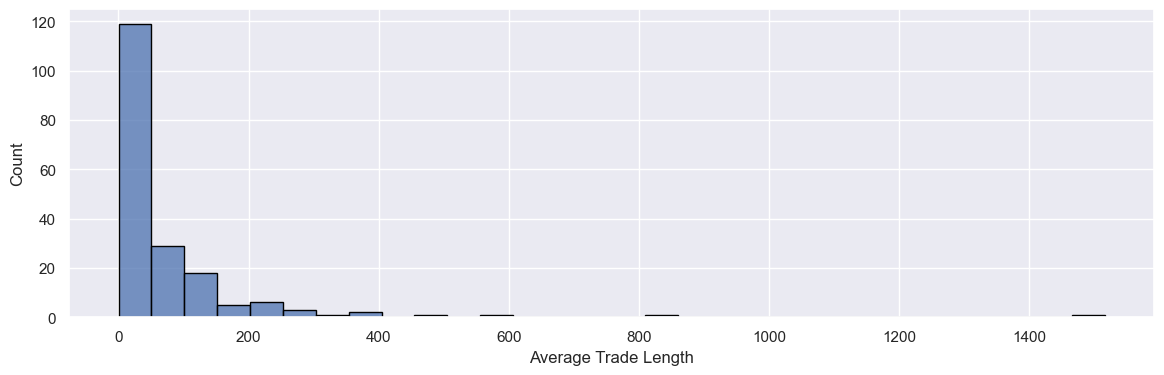

In [50]:
fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x='Average Trade Length', bins=30, ec='black');

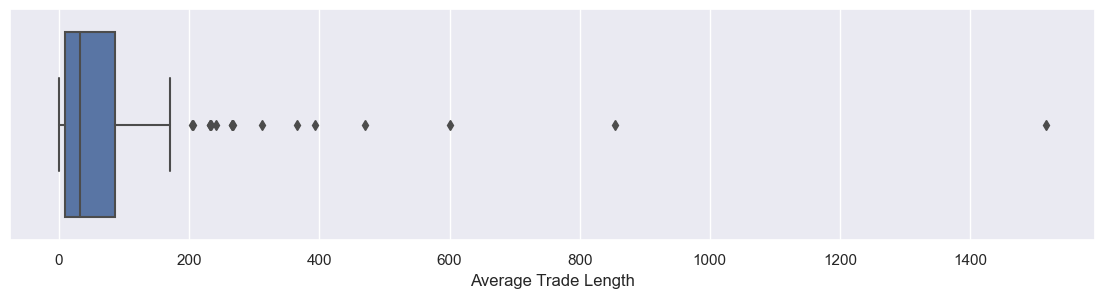

In [51]:
fig, axes = plt.subplots(figsize=(14,3))
sns.boxplot(data=df_selected, x='Average Trade Length');

More than 800 hours implies more than 33 days on average by trade. We wouldn't like to analyse strategies which take a lot of time in one single trade. 

Therefore, we can delete it.

In [52]:
df_selected[df_selected['Average Trade Length'] > 800]

,Name,ID,Hotforex url,Location,Last updated,Message,Active since,Gain,Max Drawdown,Followers,...,Number of Open Trades,Positive Closed Trades,Negative Closed Trades,Profitability,Average Profit,Average Loss,Average Lot Size,Average Trade Length,Activity,Num days strategies
117,daigo_doya,35327998,https://my.hfm.com/en/hfcopy/provider-details....,Japan,2023-07-11 01:24:25,"""Planned averaging. Focus on small lots.mid-te...",2022-08-23,1.40,1.70,0.0,...,34.0,43.0,4.0,91.49,23.85,-11.81,0.01,1516.177778,"{'Symbol': ['USDCHF', 'USDJPY', 'USDJPY', 'USD...",442.0
155,nio2023,35389982,https://my.hfm.com/en/hfcopy/provider-details....,Indonesia,2023-07-11 02:05:10,"""intraday, long trading dan scalping trade GBP...",2023-06-02,-25.11,10.22,5.0,...,1.0,2.0,1.0,66.67,1.13,-51.31,0.01,853.681389,"{'Symbol': ['CHFJPY', 'CHFJPY', 'CHFJPY'], 'Ac...",159.0


In [53]:
index_to_drop = df_selected[df_selected['Average Trade Length'] > 800].index

# Drop row
df_selected.drop(index_to_drop, axis=0, inplace=True)

# Reset index
df_selected.reset_index(drop=True, inplace=True)

Average trade length between 200 and 600 hours implies between 8 and 25 days.

These are mid term strategies and maybe it could be interesting to copy one of them.

### Profitability

Percentage of closed operations with positive profits:

```python
"Positive Closed Trades" / "Number of Closed Trades".
```


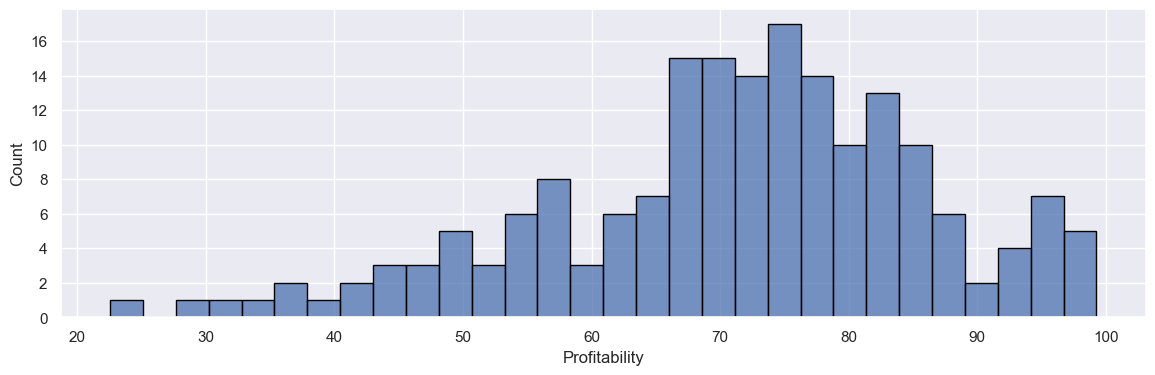

In [54]:
fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x='Profitability', bins=30, ec='black');

Most of the strategies have profitability higher than 50%.

### Number of Closed Trades

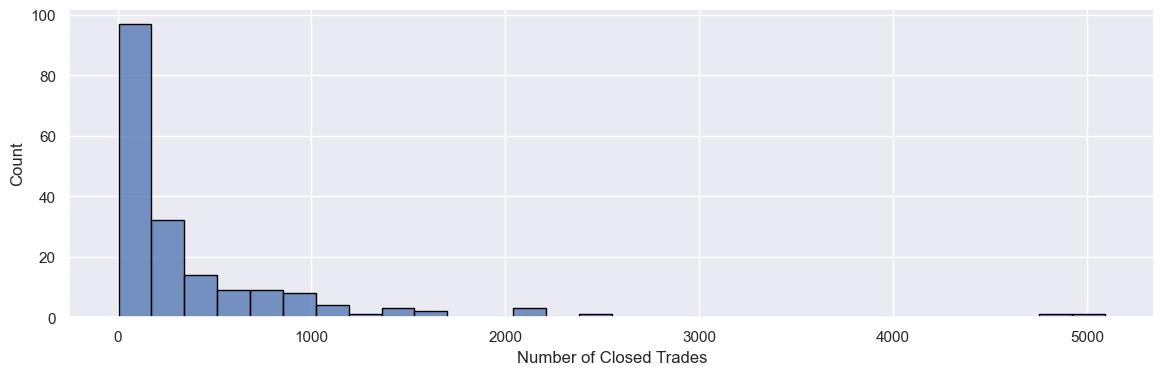

In [55]:
fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x='Number of Closed Trades', bins=30, ec='black');

There are strategies with more than 2000 trades.  Therefore, it could be interesting to know the average of trades by day.

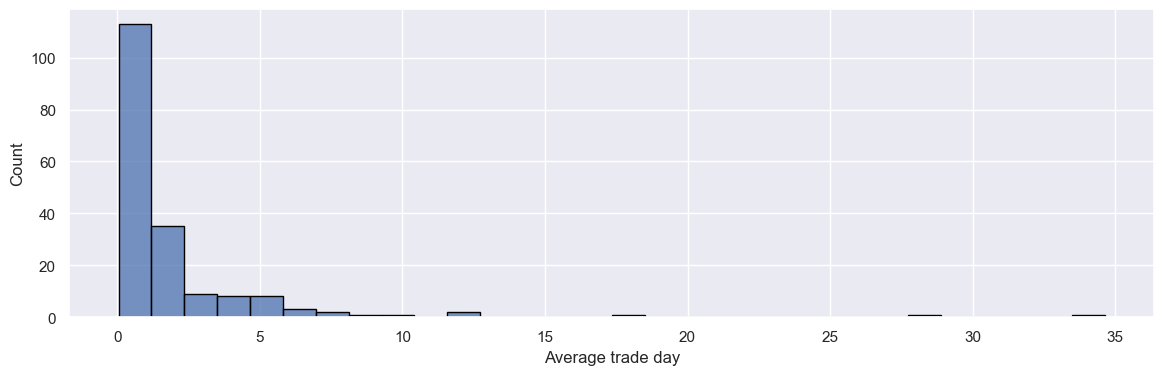

In [56]:
df_selected['Average trade day'] = df_selected['Number of Closed Trades'] / df_selected['Num days strategies']

fig, axes = plt.subplots(figsize=(14,4))
sns.histplot(data=df_selected, x= 'Average trade day', bins=30, ec='black');

There are strategies with more than 10 trades by day. This is a lot of trades in one single day.

In [57]:
condition = df_selected[df_selected['Average trade day'] >= 10].index

df_selected.loc[condition, ['Max Drawdown', 'Followers', 'Gain', 'Number of Closed Trades', 'Num days strategies', 'Average trade day']]

,Max Drawdown,Followers,Gain,Number of Closed Trades,Num days strategies,Average trade day
2,22.56,0.0,582.12,2043.0,169.0,12.088757
26,11.40,19.0,133.17,5092.0,147.0,34.639456
45,8.41,27.0,79.65,1598.0,90.0,17.755556
80,7.61,0.0,23.16,2202.0,182.0,12.098901
118,15.61,209.0,1.26,2540.0,90.0,28.222222


It is important to note that all of these strategies have less than 180 days (6 months). The highest number of trades surely affect the output metrics the performance of the strategies.